<!-- <center><center><img src="https://raw.githubusercontent.com/makaires77/fioce/master/assets/logo_fioce.png" 
style="height:150px" alt="Logo_Fiocruz"></center></center> -->

<center><center><img src="https://user-images.githubusercontent.com/61051085/81343928-3ce9d500-908c-11ea-9850-0210b4e94ba0.jpg" 
style="height:150px" alt="Logo_Unifor"></center></center>

## <center>Análise estatística dos métodos para<br />montar datasets para Graph Machine Learning</center>

Uma análise estatística para avaliar utilização dos dados dos currículos Lattes para modelo de Grafo de análises em PDI.

    Antonio Marcos Aires Barbosa

# <b>Estudo estatístico dos tempos de execução</b>

### Descrição dos procedimentos para gerar dataset de artigos em periódicos

Foi estudado o desempenho de 06 métodos diferentes para montar datasets a partir de listas de dicionários. Comparando implementações dos tipos singlethread em CPU e em GPU, multithread em CPU e em GPU, em implementações Python e Golang. São realizadas um número $n$ de seções de medição onde cada experimento é realizado com monitoramento do tempo de execução e do nível de recursos de CPU, GPU e quantidade de Threads ativas para compor os dados de cada um dos tipos de experimento que serão plotados na conclusão das seções de experimentos.

Nas implementações em python, um mesmo conjunto de atividades para gerar o dataset foi realizado variando o método de processamento em cada implementação. As atividades são predominantemente de processamento, sem necessidade de interação entrada/saída (I/O). Realizam a montagem dos dados de interesse para o dataset com base na normalização dos arquivos de entrada em um JSON preparado para ser ingerido nas atividades de aprendizagem de máquina. Nas duas implementações em Golang, além das atividades de processamento local, foram adicionadas atividades de recuperação automatizada de informação com requisições à internet (I/O) por meio de acesso à API e raspagem de dados de páginas HTML. Essas atividades são usadas para preencher os dados faltantes por meio das buscas nas APIs do Crossref ou por &scraping& em página HTML do DOI, quando a requisição à API do Crossref apresenta algum problema ou não consegue achar o conteúdo buscado. 

Exceto por essas buscas nas APIs, cada uma das implementações dos métodos em Python e Golang aplica o mesmo fluxo de processamento para montagem do dataset, havendo ao final uma classe específica para comparar os arquivos JSON gerados por cada uma das implementações, para garantir que todos os datasets montados apresentem as mesmas informações, assim garantiu-se a validade de comparação entre os experimentos em um ambiente válido de testes de execução, já que as únicas diferenças significativas são as variáveis que se deseja estudar e comparar, neste caso usamos o exemplo do uso de CPU versus GPU e o método de paralelismo (thread ou processo).

Os métodos process_dicts e suas variantes (com GPU, multithread, e multiprocess) encapsulam esse fluxo de processamento para um conjunto de dados, aplicando o método de processamento apropriado (com ou sem GPU, single-thread, multithread ou multiprocess) a cada item do conjunto de dados.


# <b>Estudo Piloto (Fase Exploratória)</b>

- Avaliar estatisticamente cinco métodos de execução distintos os mais promissores em termos de tempos de execução

## Planejamento do Estudo Piloto

### Objetivo: 
Avaliação inicial dos 6 métodos de processamento (singlethread CPU e GPU em Python, multithread CPU e GPU em Python, e multithread em Go com e sem controle de concorrência) para montagem de datasets.

### Desenho do experimento piloto:

No experimento piloto exploratório realizado, o mesmo conjunto de dados foi processado repetidas vezes (10 vezes) para obter o tempos médios e medianos de execução, bem como os desvio padrão para cada uma das implementações. 

Este procedimento foi adotado para minimizar a variabilidade externa e focar nas diferenças causadas pelos métodos de processamento em si. Com múltiplas medições, foi possível obter uma amostra mais representativa dos tempos de execução, permitindo uma avaliação estatística mais confiável e robusta. 

Essa abordagem foi crucial, considerando que o desempenho pode ser influenciado por fatores externos ou aleatórios, como variações na carga do sistema ou no uso da memória.

### Metodologia: 
Execução repetida (10 vezes) de cada método em um conjunto de dados padronizado para coleta de tempos de execução.

Dados Coletados: Tempos de execução para cada método e cada repetição.
Análise Estatística Preliminar: Análise descritiva (média, mediana, desvio padrão) para avaliar a variabilidade e tendência central dos tempos de execução de cada método.

Estudo Principal

Questões de pesquisa:
- Q1: Multithreading é mais rápido que Singlethreading.
- Q2: Multithreading em Go é mais rápido que em Python.
- Q3: Uso de GPU é mais eficiente que CPU no processamento multithread em Python.

Objetivo: Selecionar Métodos para Análise Detalhada de Custo/Benefício: 

- Baseado nos resultados do estudo piloto, escolher os métodos mais promissores para análise comparativa detalhada.

### Testes Estatísticos: 
Foram aplicados testes de hipóteses (Teste t de Student para amostras independentes e/ou Teste U de Mann-Whitney, conforme a normalidade dos dados) para comparar os métodos selecionados.
Interpretação dos Resultados: Análise dos valores-p e estatísticas dos testes para tirar conclusões sobre as hipóteses testadas.

ANOVA: Para uma análise mais abrangente e comparação entre todos os métodos em conjunto, aplicou-se a Análise de Variância (ANOVA), focando na variação dos tempos de execução entre os métodos selecionados para identificar quais são as diferenças mais promissoras observadas a partir dos dados colhidos nos estudos piloto da fase exploratória.

Tamanho da Amostra: Avaliar se o número de repetições (10 neste caso) é suficiente para fornecer poder estatístico para os testes de hipóteses.

Análise de Normalidade: Checar a normalidade dos dados para escolher o teste estatístico mais adequado.
Interpretação Contextualizada: Considerar os resultados estatísticos no contexto das limitações e objetivos específicos do estudo.

Repetibilidade e Controle: Foram mantidas as condições experimentais consistentes (como a máquina de teste preparada e o mesmo conjunto de dados) para garantir a validade dos resultados.

# <b>Escolher o arquivo de entrada de dados a processar</b>

In [ ]:
import os
import sys

def get_base_repo():
    """Retorna o caminho absoluto cinco níveis acima do diretório atual."""
    current_directory = os.getcwd()
    # Construir o caminho para subir cinco níveis
    path_five_levels_up = os.path.join(current_directory, '../../../../')
    # Normalizar o caminho para o formato absoluto
    absolute_path = os.path.abspath(path_five_levels_up)
    return absolute_path

# Definir a pasta de base do repositório local
base_repo_dir = get_base_repo()

# Construir os caminhos usando os.path.join
folder_utils = os.path.join(base_repo_dir, 'utils')
folder_domain = os.path.join(base_repo_dir, 'source', 'domain')
folder_data_input = os.path.join(base_repo_dir, 'data', 'input')
folder_data_output = os.path.join(base_repo_dir, 'data', 'output')

# Adicionar pastas locais ao sys.path para permitir importação de pacotes
sys.path.append(folder_utils)
sys.path.append(folder_domain)
from experiment_monitor import ExperimentMonitor
from articles_counter import ArticlesCounter
from json_fle_manager import JSONFileManager as jfm
from experiment_profiler import TimeProfiler

# Para o caso de folder_data_prod, que parece ser exclusivo para ambientes Unix
folder_data_prod = os.path.join(base_repo_dir, 'data') if not 'win' in sys.platform else None

print(f" Caminho base do repositório: {base_repo_dir}")
print(f"Arquivos de entrada de dados: {jfm.list_json_files(folder_data_input)}")

In [ ]:
# Definir arquivo dados brutos a processar e gerar dataset
profiler = TimeProfiler()
monitor = ExperimentMonitor(base_repo_dir, profiler)
filename = 'dict_list_fioce.json'
dict_list = monitor.load_from_json(folder_data_input,filename)
print(f"{' '*30}{len(dict_list)} currículos carregados arquivo: '{filename}'")

if monitor.is_gpu_available():
    print("\nGPU disponível para execução de código.")
else:
    print("\nNão foi detectada nenhuma GPU configurada corretamente no ambiente.")

atualizador = ArticlesCounter(dict_list)
dtf_atualizado = atualizador.extrair_data_atualizacao(dict_list)
# dtf_atualizado

# Disparar execução de experimentos selecionados

In [ ]:
# # Selecionar os experimentos a correr pelos números de índice
# experiment_indices = [1,2,3,4]

# # Definir número de seções (corridas) de experimentos
# number_of_sections = 1

# # Executar os experimentos selecionados pelos índices
# monitor.run_selected_experiments(dict_list, experiment_indices, number_of_sections)

In [ ]:
# imagepath = os.path.join(os.path.join(base_repo_dir, 'data', 'output',
#                                       'Experiments_Py_Title_Go_TitleAbstract.png'))

<!-- 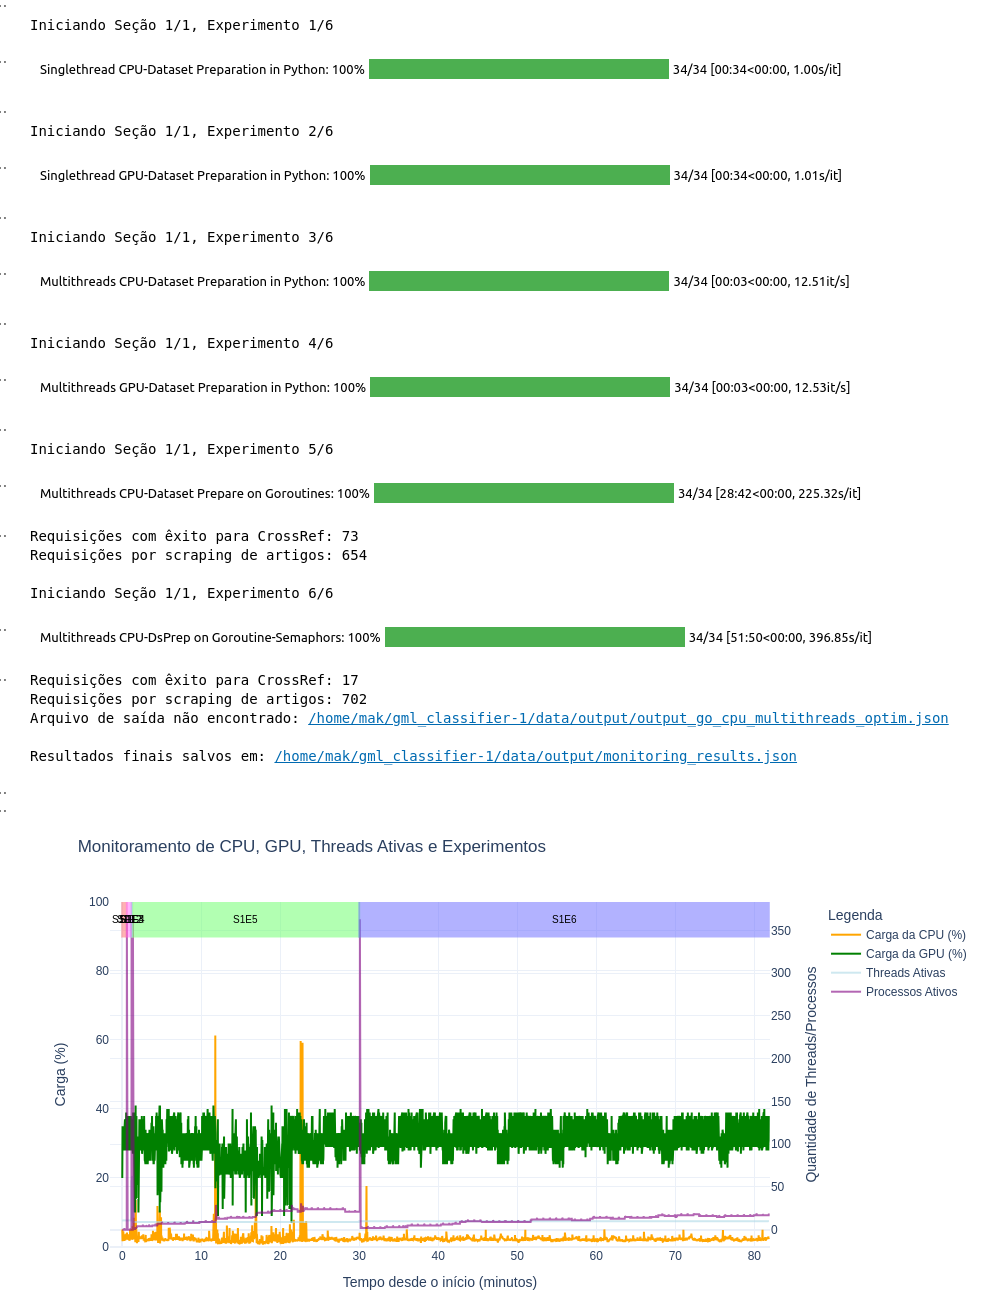 -->

# Disparar execução de todos experimentos:

    Exp1. Python Singlethread CPU - Dataset Preparation 
    Exp2. Python Singlethread GPU - Dataset Preparation
    Exp3. Python Multithreads CPU - Dataset Preparation
    Exp4. Python Multithreads GPU - Dataset Preparation
    Exp5. Golang Multithreads CPU Goroutines - DataPrep
    Exp6. Golang Multithreads CPU Gort-Semap - DataPrep

In [ ]:
## Definir caminho para os pacotes locais
# Base do diretório do repositório
base_repo_dir = None
if 'win' in sys.platform:
    base_repo_dir = 'C:\\Users\\marcos.aires\\gml_classifier-1'  # Caminho base no Windows
else:
    base_repo_dir = '/home/mak/gml_classifier-1'  # Caminho base em Linux

# Construir os caminhos usando os.path.join
folder_utils = os.path.join(base_repo_dir, 'utils')
folder_domain = os.path.join(base_repo_dir, 'source', 'domain')
folder_data_input = os.path.join(base_repo_dir, 'data', 'input')
folder_data_output = os.path.join(base_repo_dir, 'data', 'output')

# Adicionar pastas locais ao sys.path para permitir importação de pacotes
sys.path.append(folder_utils)
sys.path.append(folder_domain)
from articles_counter import ArticlesCounter
from experiment_monitor import ExperimentMonitor
from json_fle_manager import JSONFileManager as jfm

## Rodar experimentação
# Definir número de seções (corridas) de experimentos
number_of_sections = 10

# Disparar o processo de execução de todos os experimentos
monitor.run_all_experiments(dict_list, n=number_of_sections)

# Após executar todos os experimentos, plotar os dados de monitoramento
monitor.plot_monitoring_data()

# Plotar monitoramento e profilling

In [ ]:
# Plotar os dados de monitoramento dos experimentos selecionados
all_results = os.path.join(folder_data_output,'monitoring_results.json')
monitor.plot_monitoring_data(all_results)

selected_results = os.path.join(folder_data_output,'monitoring_selected_results.json')
monitor.plot_monitoring_data(selected_results)


## Perfilamento de tempos de execução por tipo de tarefa

In [ ]:
profile_data = os.path.join(folder_data_output,'profile_data_selected.json')
monitor.plot_radar_profile(profile_data)
monitor.plot_stacked_segment(profile_data)
monitor.plot_stacked_experiment(profile_data)

### Exibição em tabelas

In [ ]:
import pandas as pd
profile_data = jfm.load_json(folder_data_output,'profile_data_all.json')
print(len(profile_data), 'tomadas de tempo de segmento')

In [ ]:
print(list(profile_data[0].keys()))
df_profile = pd.DataFrame(profile_data)

# Agrupar por 'Experiment' e 'Segment' e calcular a soma acumulada de 'Time'
grouped_data = df_profile.groupby(['Experiment', 'Segment'])['Time'].sum().reset_index()
grouped_data

In [ ]:
# Criar uma tabela pivot
pivot_table = df_profile.pivot_table(index='Segment', columns='Experiment', values='Time', aggfunc='sum')
pivot_table

In [ ]:
df_profile['Segment'].value_counts()

In [ ]:
# filename='profile_results.prof'
# file_path = os.path.join(folder_data_output,filename)
# monitor.analyze_performance(file_path)

## Verificar integridade dos datasets gerados

In [ ]:
jfm.compare_all_json_pairs(show_details=False)

In [ ]:
# jfm.compare_specific_files('output_multithreading_golang.json', 
#                             'output_py_gpu_multithreads.json')

In [ ]:
# Usando a classe JSONFileManager

# Carregar os datasets (os.path.join(folder_data_output,) já dentro do jfm.load_json
dataset_stpycpu = jfm.load_json(folder_data_output,'output_py_cpu_singlethread.json')
dataset_stpygpu = jfm.load_json(folder_data_output,'output_py_gpu_singlethread.json')
dataset_mtpycpu = jfm.load_json(folder_data_output,'output_py_gpu_multithreads.json')
dataset_mtgocpu = jfm.load_json(folder_data_output,'output_go_cpu_multithreads.json')
dataset_mtgoopt = jfm.load_json(folder_data_output,'output_go_cpu_mthreadoptim.json')

# Comparar os datasets
diff_1to2 = jfm.compare_lists_of_dictionaries(dataset_stpycpu, dataset_stpygpu)
diff_2to1 = jfm.compare_lists_of_dictionaries(dataset_mtpycpu, dataset_mtgocpu)

# Imprimir as diferenças encontradas (se houver)
print(f"{len(diff_1to2):02} diferenças do dataset 1 para 2")
if diff_1to2:
    print("Diferenças:")
    for diff in diff_1to2:    
        print(diff)

print(f"\n{len(diff_2to1):02} diferenças do dataset 2 para 1")
if diff_2to1:
    print("Diferenças:")
    for diff in diff_2to1:
        print(diff)


In [ ]:
for i in dataset_stpycpu:
    print(list(i.get('processed_data').keys()))

## Verificar completude dos datasets gerados

In [ ]:
# contar recursivamente as entradas de cada dicionário
file = 'output_py_cpu_singlethread.json'
dataset = jfm.load_json(folder_data_output,file)
list(dataset[0])

In [ ]:
# contar recursivamente as entradas de cada dicionário
file = 'output_py_gpu_multithreads.json'
dataset = jfm.load_json(folder_data_output,file)
dataset[7].keys()

In [ ]:
# contar recursivamente as entradas de cada dicionário
# file = 'output_go_cpu_multithreads.json'
# dataset = jfm.load_json(folder_data_output,file)
# dataset[33]

In [ ]:
# jfm.count_items_in_json(dataset)

In [ ]:
# checar presença dos dados essenciais para treinar modelo de classificação na árvore do CNPq
filepath = os.path.join(folder_data_output,'output_py_gpu_singlethread.json')

essential_keys=['id_lattes', 'name', 'areas_of_expertise', 'articles', 'profiling_data']
jfm.check_essential_data(filepath, essential_keys)

# <b>Estatística Descritiva experimentos</b>

In [ ]:
json_curriculum_data = jfm.load_json(folder_data_input, filepath)
print(f"{type(json_curriculum_data)} of {type(next(iter(json_curriculum_data)))}")
curriculo_item_count = jfm.count_items_in_json(next(iter(json_curriculum_data)))
curriculo_item_count.keys()

In [ ]:
def recursive_check(value, indent=0):
    if isinstance(value, dict):
        des = 'elementos' if len(value) >1 else 'elemento'
        print(f"{' ' * indent}Dicionário com {len(value):02} {des}")
        for key, val in value.items():
            # print(f"{' ' * (indent + 8)} {key:>12}: {type(key)} of {type(val)}")
            print(f"{' ' * (indent + 8)} {key:>12}")
            if not isinstance(val, str):
                try:
                    recursive_check(val, indent + 8)
                except:
                    pass

    elif isinstance(value, list):
        des = 'elementos' if len(value) >1 else 'elemento'
        print(f"{' ' * indent}Lista com {len(value):02} {des}")
        for val in value:
            # print(f"{' ' * (indent + 4)}Tipo de elemento: {type(val)}")
            if not isinstance(val, str):
                try:
                    recursive_check(val, indent + 8)
                except:
                    pass

    elif isinstance(value, str):
        # print(f"{' ' * indent}String: {value}")
        pass

In [ ]:
# filepath = os.path.join(folder_data_input,'dict_list_fioce.json')
# json_curriculum_data = jfm.load_json(filepath)
# recursive_check(json_curriculum_data)

In [ ]:
json_results_data = jfm.load_json(folder_data_output,'monitoring_results.json')
# recursive_check(json_results_data)

In [ ]:
# Mapear os experimentos para suas abreviações
def sigla_generator():
    exp = json_results_data['monitoring_data'].get('experiments')
    exp_labels = []
    experiment_labels = {
        exp: f"S{exp.split(' ')[1][0]}E{exp.split(' ')[4].split('/')[0]}"
        for exp in (json_results_data['monitoring_data'].get('experiments'))
    }
    for i in experiment_labels.items():
        exp_labels.append(i)
    
    return exp_labels

In [ ]:
lista = sorted(sigla_generator())
lista

In [ ]:
import json
import pandas as pd

# Processar os dados para criar um DataFrame
data = []
for section in json_results_data["experiment_results"]:
    for section_name, experiments in section.items():
        if isinstance(experiments, list):
            for experiment in experiments:
                if isinstance(experiment, dict):
                    data.append({
                        "section_numbers": section_name,
                        "experiment_numbers": experiment["experiment_number"],
                        "execution_times": experiment["execution_time"]
                    })
                else:  # Tratando casos onde a lista contém diretamente os tempos de execução
                    data.append({
                        "section_numbers": section_name,
                        "experiment_numbers": None,
                        "execution_times": experiment
                    })
        else:
            # Caso onde a seção contém diretamente uma lista de tempos de execução
            avg_time = sum(experiments) / len(experiments)
            data.append({
                "section_numbers": section_name,
                "average_execution_times": avg_time
            })


# Filtrar apenas os dados que possuem "experiment_number"
experiment_data = [d for d in data if d.get("experiment_numbers") is not None]

# Criar um DataFrame com esses dados
sections_df = pd.DataFrame(experiment_data)

print(f"Experimentos piloto de avaliação do tempo de execução no dataframe 'sections_df'")
print(f"  {len(sections_df)} medições exploratórias, para cada método de execução")

sections_df

In [ ]:
# Calcular tempos médios e medianos para cada método de execução de "experiment_number"
grouped_data = sections_df.groupby("experiment_numbers").agg(
    Average_Execution_Time=("execution_times", "mean"),
    Median_Execution_Time=("execution_times", "median"),
    Standard_Deviation=("execution_times", "std"),
    Variance=("execution_times", "var")    
).reset_index()

# Criar DataFrame
df_grouped = pd.DataFrame(grouped_data)
df_grouped

## Visualização dos dados do estudo piloto

In [ ]:
# Convertendo o DataFrame para JSON
sections_df_json = sections_df.to_json(orient="records")

# Salvar o JSON em disco
json_file_path = os.path.join(folder_data_output,'pilot_results_sections.json')
with open(json_file_path, 'w') as file:
    file.write(sections_df_json)

json_file_path

In [ ]:
from descriptive_statistics import DescriptiveStatistics, ResultLoader, ExecutionTimeComparator, Plotter

print(f"Estatísticas descritivas levantadas:")
descriptive_stats = DescriptiveStatistics(os.path.join(folder_data_output,'pilot_results_sections.json'))
descriptive_stats.print_statistics()
iqr_results = descriptive_stats.calculate_iqr()

print("Intervalos interquartis (IQR):")
interpretations = descriptive_stats.interpret_iqr(iqr_results)
for method, interp in interpretations.items():
    print(interp)

In [ ]:
import os
import sys

def get_base_repo():
    """Retorna o caminho absoluto cinco níveis acima do diretório atual."""
    current_directory = os.getcwd()
    # Construir o caminho para subir cinco níveis
    path_five_levels_up = os.path.join(current_directory, '../../../../')
    # Normalizar o caminho para o formato absoluto
    absolute_path = os.path.abspath(path_five_levels_up)
    return absolute_path

# Definir a pasta de base do repositório local
base_repo_dir = get_base_repo()

# Construir os caminhos usando os.path.join
folder_utils = os.path.join(base_repo_dir, 'utils')
folder_domain = os.path.join(base_repo_dir, 'source', 'domain')
folder_data_input = os.path.join(base_repo_dir, 'data', 'input')
folder_data_output = os.path.join(base_repo_dir, 'data', 'output')

# Adicionar pastas locais ao sys.path para permitir importação de pacotes
sys.path.append(folder_utils)
sys.path.append(folder_domain)
from experiment_monitor import ExperimentMonitor
from articles_counter import ArticlesCounter
from json_fle_manager import JSONFileManager as jfm
from experiment_profiler import TimeProfiler
from descriptive_statistics import DescriptiveStatistics, ResultLoader, ExecutionTimeComparator, Plotter

# Para o caso de folder_data_prod, que parece ser exclusivo para ambientes Unix
folder_data_prod = os.path.join(base_repo_dir, 'data') if not 'win' in sys.platform else None

print(f" Caminho base do repositório: {base_repo_dir}")
print(f"Arquivos de entrada de dados: {jfm.list_json_files(folder_data_input)}")

In [ ]:
section_results = jfm.load_json(folder_data_output, 'pilot_results_sections.json')

In [ ]:
# Reestruturação, assumindo que cada 'experiment_numbers' é um método diferente
# def restructure_results(section_results):
#     # Criar um dicionário para agrupar tempos de execução por número do experimento
#     method_times = {}
#     for res in section_results:
#         method_name = f"Método {res['experiment_numbers']}"
#         method_times.setdefault(method_name, []).append(res['execution_times'])

#     # Criar uma lista de dicionários no formato esperado pela classe Plotter
#     restructured_results = []
#     for method, times in method_times.items():
#         restructured_results.append({'execution_times': {method: times}})

#     return restructured_results

# Utilizando a função de reestruturação
# results = restructure_results(section_results)

# comparator = ExecutionTimeComparator(results)
# compare_all = comparator.compare_methods()

# worst_method = compare_all[0].get('method1')
# best_method = compare_all[0].get('method2')
# greater_average_comparision = compare_all[0].get('average_ratio')
# greater_median_comparision = compare_all[0].get('median_ratio')

# second_worst_method = compare_all[1].get('method1')
# second_best_method = compare_all[1].get('method2')
# second_greater_average_comparision = compare_all[1].get('average_ratio')
# second_greater_median_comparision = compare_all[1].get('median_ratio')

# print(f"\nMaiores reduções no tempo de execução medidas no experimento piloto:")
# print(f"  Entre {worst_method} e {best_method} redução no tempo médio de {greater_average_comparision} vezes, e no tempo mediano de {greater_median_comparision} vezes")
# print(f"  Entre {second_worst_method} e {second_best_method} redução no tempo médio de {second_greater_average_comparision} vezes, e no tempo mediano de {second_greater_median_comparision} vezes")
# print(f"\nSegue todas as comparações de possíveis melhorias realizadas quanto ao ganho em tempo de execução:")
# for k,comparison in enumerate(compare_all):
#     print(f"  De {compare_all[k].get('method1'):>19} para {compare_all[k].get('method2'):>19} mostrou tempo mediano {compare_all[k].get('median_ratio')} melhor")

# compare_multithread = comparator.compare_methods('multithread')
# print(f"\nComparando somente entre os métodos em multithreading, segue as comparações ordenadas do maior para menor ganho em tempo de execução:")
# compare = compare_multithread
# for k,comparison in enumerate(compare):
#     print(f"  De {compare[k].get('method1'):>19} para {compare[k].get('method2'):>19} mostrou tempo mediano {compare[k].get('median_ratio')} melhor") 

In [ ]:
colors = ['blue', 'yellow', 'green', 'orange', 'purple']
plotter = Plotter(section_results, colors)
plotter.plot_boxplot()

In [ ]:
plotter.plot_boxplots()

In [ ]:
plotter.plot_execution_times_comparison()

In [ ]:
plotter.plot_scatter()  

## Interpretar estatística descritiva estudo exploratório piloto:

A variação (desvio padrão) é relativamente baixa para o método 'multithreads_cpu_go', mas mais alta para os outros métodos. Isso sugere que os resultados para o Golang são mais consistentes.

Foram realizadas 10 medições exploratórias para cada método, como ponto de partida para análises exploratórias. No entanto, para resultados mais conclusivos, especialmente em situações com maior variação, um número maior de medições pode ser necessário no estudo principal.

Quanto à magnitude das Diferenças, já nos estudos exploratórios foi notória a diferença relevante nos tempos médios e medianos entre os métodos de multithreading e singlethreading, sugerindo que a hipótese h1 (multithreading é mais rápido que singlethreading) pode ser suportada. Já quanto à diferença entre as implementações em multithreading em Python versus Golang a diferença, embora aparente, foi pequena, demandando um teste de hipóteses específico dentro do estudo principal para determinar se essa diferença é estatisticamente significativa para h2.

Para avaliação mais precisa, realizamos testes estatísticos ANOVA e teste t, para h1 e h2, levando em consideração as observações exploratórias, para avaliar se os p-valores são baixos o suficiente (abaixo de 0.05) para comprovar que as diferenças observadas são estatisticamente significativas.

## Cálculo da Análise de variância (ANOVA) 

In [ ]:
# !pip3 install statsmodels

In [ ]:
# Instanciar e rodar análise ANOVA do experimento principal
from descriptive_statistics import ANOVA

analysis = ANOVA(df)
anova_results = analysis.perform_anova()
anova_results

In [ ]:
post_hoc_results = analysis.perform_post_hoc_tests()
analysis.interpret_results(anova_results, post_hoc_results)

## Memória de cálculo ANOVA dos métodos avaliados em conjunto

Soma dos Quadrados (sum_sq):

- Método:   1.802275 × 10^7 é a soma dos quadrados devido aos métodos, indicando a variação total atribuída aos diferentes métodos.
- Residual: 1.505069 × 10^6 é a soma dos quadrados residual, indicando a variação dentro dos grupos, ou seja, a variação nos tempos de execução que não é explicada pelos diferentes métodos.

Graus de Liberdade (df):

- Método: 4 representa o número de grupos (métodos) menos um.
- Residual: 45 calculado como o número total de observações menos o número de grupos (neste caso, 50 - 5).
- F-Statistic (F):Valor: 134.715304 é o valor da estatística F, usado para determinar a significância estatística. Um valor F alto sugere que há variação significativa entre os grupos.
- P-Value (PR(>F)): Valor: 1.963770 × 10^−24 é um valor p extremamente pequeno, o que indica que as diferenças nos tempos de execução entre os cinco métodos são estatisticamente significativas, como esperado.

Conclusão

- Significância Estatística: Dado o valor p muito baixo, podemos rejeitar a hipótese nula de que todos os métodos têm o mesmo tempo médio de execução. Isso indica que pelo menos um dos métodos difere significativamente dos outros em termos de tempo de execução.

### Descrição dos cálculos do Teste de Tukey
Os resultados do teste post-hoc de Tukey HSD fornecem uma análise detalhada das diferenças entre os pares de métodos. 

#### Diferença de Médias (meandiff):

- Indica a diferença média nos tempos de execução entre os dois métodos comparados.
Valor P (p-adj):

- Mostra a significância estatística da diferença entre cada par de métodos. Um valor p ajustado abaixo de 0.05 indica uma diferença estatisticamente significativa.
Intervalo de Confiança (lower, upper):

- Fornece o intervalo de confiança para a diferença de médias. Se este intervalo não incluir zero, a diferença é considerada estatisticamente significativa.
Rejeição da Hipótese Nula (reject):

- 'True' indica que a hipótese nula de não haver diferença significativa entre os dois métodos foi rejeitada. 'False' indica que não há evidência suficiente para rejeitar a hipótese nula.

- Significativas vs Não Significativas: As diferenças nos tempos de execução entre 'multithreads_cpu_go' e ambos os métodos 'singlethread_cpu_py' e 'singlethread_gpu_py' são significativas. Similarmente, as diferenças entre 'multithreads_cpu_py' ou 'multithreads_gpu_py' e os métodos 'singlethread' também são significativas. Não há diferenças significativas entre 'multithreads_cpu_go' e 'multithreads_cpu_py' ou 'multithreads_gpu_py', nem entre 'multithreads_cpu_py' e 'multithreads_gpu_py', nem entre 'singlethread_cpu_py' e 'singlethread_gpu_py'.

### Comparação do processamento serial com o processamento paralelo em CPU

Como esperado, os métodos "singlethread" (tanto CPU quanto GPU) são estatisticamente mais lentos que os métodos "multithread" (CPU e GPU), sendo a ordem de grandeza da diferença possível de ser expressa pela comparação dos tempos médios de execução na ordem de quatro vezes mais rápido processar em multithread que em singlethread, sugerindo que os métodos "multithread" são mais eficientes em termos de tempo de execução.

Porém, não foi possível detectar diferença estatisticamente significante entre os métodos "multithreads_cpu_py", "multithreads_gpu_py" e "multithreads_cpu_go", indicando que podem ser igualmente eficientes em termos de tempo de execução dentro do contexto dos experimentos realizados.

### Comparar processo multithreading em CPU implementações Python versus Golang

Já a análise dos resultados do teste post-hoc de Tukey HSD para a comparação específica entre os métodos "multithreads_cpu_go" implementado em Golang e "multithreads_cpu_py" implementado em Python, podemos fazer a seguinte interpretação:

Comparação Entre "multithreads_cpu_go" e "multithreads_cpu_py":

- Diferença de Médias (meandiff): -125.8074
- Valor P (p-adj): 0.5438
- Intervalo de Confiança: de -358.2025 a 106.5877
- Rejeição da Hipótese Nula (reject): False

### Explicação da análise

- Diferença de Médias: A diferença média nos tempos de execução entre os métodos 'multithread' em Golang e Python é de -125.8074. Isso indica que, em média, o método 'multithreads_cpu_py' (Python) é ligeiramente mais rápido do que o método 'multithreads_cpu_go' (Golang), mas essa diferença é relativamente pequena.

- Significância Estatística: O valor p de 0.5438 é bem acima do limiar comum de 0.05, o que significa que a diferença observada entre os dois métodos não é estatisticamente significativa.

- Intervalo de Confiança: O intervalo de confiança para a diferença de médias inclui zero, reforçando a conclusão de que não há uma diferença estatisticamente significativa entre os métodos.

- Rejeição da Hipótese Nula: Como o valor 'reject' é False, não rejeitamos a hipótese nula. Isso sugere que não há evidência suficiente para afirmar que existe uma diferença significativa nos tempos de execução entre 'multithreads_cpu_go' e 'multithreads_cpu_py'.

### Conclusão Prática

Com base nos resultados do teste de Tukey HSD, podemos concluir que, em termos de tempo de execução, não há uma diferença significativa entre os métodos 'multithreads_cpu_go' (Golang) e 'multithreads_cpu_py' (Python). Isso sugere que ambos os métodos são comparáveis em termos de eficiência de tempo de execução para as tarefas testadas no seu estudo. Portanto, a escolha entre esses dois métodos pode ser baseada em outros fatores, como preferências de linguagem de programação, familiaridade com a tecnologia, disponibilidade de bibliotecas e recursos, entre outros aspectos práticos.

## Quadro de Resultados da Análise de Variância (ANOVA)

A tabela ANOVA apresenta os seguintes resultados:

| Fonte de Variação | Soma dos Quadrados (SQ) | Graus de Liberdade (gl) | F      | p-valor                |
| ----------------- | ----------------------- | ----------------------- | ------ | ---------------------- |
| Método            | 94367.95                | 1                       | 2403.41| 3.32 × 10<sup>-11</sup>|
| Residual          | 314.11                  | 8                       | NA     | NA                     |

- A "Soma dos Quadrados" para o Método é significativamente maior do que a Residual, indicando uma forte influência do método no tempo de execução.
- O valor de F é 2403.41, o que é bastante elevado, mostrando que a variação entre os grupos é significativamente maior do que dentro dos grupos.
- O p-valor é extremamente baixo (3.32 × 10<sup>-11</sup>), o que indica que as diferenças entre os métodos são estatisticamente significativas.

## Teste Post-Hoc (Tukey HSD)

Os resultados do teste Tukey HSD são os seguintes:

| Grupo 1           | Grupo 2           | Diferença de Médias | p-valor ajustado | Intervalo de Confiança Inferior | Superior |
| ----------------- | ----------------- | ------------------- | ---------------- | ------------------------------ | -------- |
| multithreads_cpu_go| multithreads_cpu_py| -194.29             | 0.0000           | -203.43                        | -185.15  |

- Existe uma diferença significativa na média de tempo de execução entre os métodos 'multithreads_cpu_go' e 'multithreads_cpu_py'.
- A média do método 'multithreads_cpu_py' é 194.29 unidades menor que a do método 'multithreads_cpu_go', o que é estatisticamente significativo (p-valor ajustado = 0.0000).
- O intervalo de confiança não inclui 0, reforçando que a diferença observada é significativa.


## Interpretar resultados da ANOVA e do Teste de Tukey HSD:

1. **Resultados da ANOVA**: O valor-p muito baixo (1.963770e-24) indica que existem diferenças significativas nos tempos de execução entre os métodos analisados. Isso sugere que pelo menos um dos métodos difere significativamente dos outros em termos de tempo de execução.

2. **Resultados do Teste Post-Hoc (Tukey HSD)**: Este teste detalha quais pares específicos de métodos têm diferenças significativas:
   - **Diferenças significativas**: Foram observadas entre os métodos de multithreading (tanto em Python quanto em Go) e os métodos de singlethreading (tanto em Python quanto em GPU). Isso sugere que os métodos de multithreading são significativamente mais rápidos do que os métodos de singlethreading.
   - **Sem diferenças significativas**: Entre os métodos de multithreading em Python e Go, e entre os métodos de singlethreading em Python e em GPU. Isso sugere que, estatisticamente, esses métodos têm desempenhos semelhantes em termos de tempo de execução.

Alguma discrepância pode surgir entre os resultados dos testes de hipóteses individuais e a ANOVA com Tukey HSD devido à natureza desses testes. 

A ANOVA testa diferenças entre grupos, enquanto os testes de hipóteses individuais podem se concentrar em comparações específicas. 

A ANOVA, seguida pelo Teste de Tukey, fornece uma visão mais abrangente das diferenças entre todos os métodos comparados, enquanto os testes de hipóteses individuais oferecem uma visão mais direcionada das comparações específicas.

# <b>Estudo Principal</b>

- Utilizando o paralelismo por MultiThreading em CPU, comparar implementações Pyhton versus Golang

## Avaliação do tamanho das amostras para Estudo Principal

A avaliação da suficiência da quantidade de amostras para conduzir o Estudo Principal com base nos resultados da estatística descritiva e do IQR envolve considerar a variabilidade e a consistência dos dados. Aqui estão alguns pontos a considerar:

Desvio Padrão e Variação: Os métodos singlethread_cpu_py, singlethread_gpu_py, multithreads_cpu_py e multithreads_gpu_py mostram desvios padrão relativamente altos e IQRs significativos, indicando uma variabilidade considerável nos tempos de execução. Isso pode sugerir a necessidade de coletar mais amostras para obter estimativas mais precisas.

Consistência: O método multithreads_cpu_go mostra um desvio padrão muito baixo e um IQR pequeno, indicando resultados consistentes. Para este método, as 10 amostras parecem suficientes.

Número de Amostras (count): Embora 10 amostras possam ser suficientes para uma análise preliminar, para testes estatísticos mais robustos, especialmente quando há variabilidade significativa, é geralmente recomendado um número maior de amostras. Isso aumenta a precisão das estimativas e a confiabilidade dos testes de hipóteses.

Análise de Outliers: O IQR alto sugere a possibilidade de outliers. Seria prudente investigar esses outliers e considerar coletar mais dados para garantir que os resultados não sejam distorcidos por poucas observações atípicas.

Com base nessa análise, para os métodos com alta variabilidade e IQRs significativos, seria aconselhável coletar mais amostras antes de prosseguir para o Estudo Principal. Isso ajudaria a garantir que as conclusões sejam baseadas em dados representativos e robustos.

## Avaliação da normalidade dos dados

In [ ]:
from descriptive_statistics import DataNormalityTest
from pprint import pprint

normality_test = DataNormalityTest(results)
normality_results = normality_test.test_normality()
normality_test_interpretations = normality_test.interpret_normality_results()

for i in normality_test_interpretations.values():
    pprint(i, width=140)
    print()

## Teste t de Student para hipótese avaliar diferença CPU/GPU

In [ ]:
from descriptive_statistics import StudentTTest

t_test = StudentTTest(results)
comparision = ('multithreads_cpu_py', 'multithreads_gpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)
print()

## Planejamento das Hipóteses do Estudo Principal

Com base nos resultados dos estudos piloto, os resultados da análise exploratória e do teste de normalidade, permitiram selecionar os métodos para o estudo principal.

A análise das estatísticas descritivas revelou diferenças significativas nos tempos de execução entre os métodos. Especialmente notável foi a diferença entre os métodos de multithreading (Python e Go) e os métodos de singlethreading.

Quanto ao teste de normalidade dos dados, quatro dos cinco métodos (todos exceto multithreads_cpu_go) apresentaram evidências de seguir uma distribuição normal, indicando a adequação de testes paramétricos para a comparação.

O método multithreads_cpu_go foi excluído do estudo principal, por não seguir uma distribuição normal, sendo analisado separadamente usando teste não paramétricos, com o teste de Mann-Whitney.

A comparação entre CPU e GPU foi abandonada devido a similaridade de desempenho. Os tempos de execução entre as implementações com CPU e GPU mostraram-se bastante similares, indicando que a variação de desempenho entre essas duas abordagens não era substancial para o contexto do estudo.

### Seleção de métodos e hipóteses para Estudo Principal: 

Com base nos resultados da fase exploratória e estudos piloto, foi direcionado o foco do estudo principal para avaliar as implementaões em Multithreading em cada Linguagem. Observou-se uma diferença de desempenho mais significativa entre os métodos de multithreading e singlethreading, e entre as implementações em Python e Go.

Portanto, o Estudo Principal foi planejado para testar as seguintes hipóteses:

- H1: A execução em multithreading é mais rápida que em singlethreading.
- H2: A execução em multithreading com Golang é mais rápida que a execução multithread em Python.


Decidiu-se incluir dos dados dos métodos 'multithreads_cpu_py' e 'multithreads_cpu_go' no estudo principal para testar a hipótese H2 (comparação entre Python e Go em multithreading), e os dados dos métodos 'singlethread_cpu_py' e 'multithreads_cpu_py' para testar a hipótese H1 (comparação entre multithreading e singlethreading).

Aplicação de Testes Estatísticos: Utilizou-se o teste t de Student para amostras independentes e o teste de Mann-Whitney, a depender da normalidade dos dados.

### Metodologia do Estudo Principal:

O Estudo Principal visa comparar dois a dois dos métodos de processamento mais promissores, foi planejado e executado seguindo estas etapas:

- Planejamento do Estudo Principal: Com base nos resultados preliminares, focou-se na comparação entre métodos de multithreading (Python e Go) e a comparação entre multithreading e singlethreading.

Testes de Hipóteses:

- Hipótese H1 (Multithreading vs Singlethreading): Utilizou-se os métodos singlethread_cpu_py e multithreads_cpu_py para avaliar se a execução em multithreading é significativamente mais rápida que em singlethreading.

- Hipótese H2 (Multithreading em Python vs Go): Comparou-se multithreads_cpu_py e multithreads_cpu_go para determinar qual apresenta melhor desempenho.
Aplicação de Testes Estatísticos:

Para H1, aplicou-se o teste t de Student, considerando a normalidade dos dados para os métodos envolvidos.

Para H2, utilizou-se o teste de Mann-Whitney, devido à não normalidade dos dados de multithreads_cpu_go.

Interpretação dos Resultados: Os resultados foram analisados estatisticamente, com interpretações baseadas nos valores-p e estatísticas dos testes aplicados, para concluir sobre a rejeição ou não das hipóteses propostas.

## Cálcular tamanho do efeito (Cohen's d) para estudo principal

No contexto da comparação dos métodos de processamento do presente estudo os conceitos de Tamanho do Efeito e Poder Estatístico podem ser melhor compreendidos como:

Tamanho do Efeito: Indica a magnitude da diferença em tempos de execução entre os métodos comparados. Um tamanho de efeito grande significa uma diferença substancial no desempenho entre os dois métodos. Por exemplo, um tamanho de efeito grande para H1 (Multithreading vs Singlethreading) sugere que o multithreading tem um desempenho significativamente superior ao singlethreading em termos de tempo de execução.

Poder Estatístico: Refere-se à probabilidade de detectar essa diferença significativa nos tempos de execução, caso ela realmente exista. Um alto poder estatístico no contexto desse estudo significa que há uma boa chance de identificar corretamente qual método é mais rápido, reduzindo o risco de conclusões incorretas devido à variação aleatória nos tempos de execução.

O tamanho de efeito, frequentemente representado por Cohen's d na análise de comparação de médias, é classificado da seguinte forma para indicar sua magnitude:

- Pequeno: 0.2 ou próximo disso. Indica uma diferença pequena entre os grupos.

- Médio: Em torno de 0.5. Representa uma diferença moderada entre os grupos.

- Grande: 0.8 ou mais. Indica uma diferença substancial ou grande entre os grupos.

Esses valores são diretrizes gerais. Na prática, o contexto do estudo e a área de aplicação podem influenciar a interpretação da significância do tamanho do efeito. Por exemplo, em alguns campos da pesquisa, um tamanho de efeito "pequeno" pode ser muito relevante, especialmente em estudos com grandes amostras.


## Cálcular tamanho da amostra suficiente para estudo principal

In [ ]:
import numpy as np
from descriptive_statistics import SampleSizeCalculator

# Instanciando a classe SampleSizeCalculator
sample_size_calculator = SampleSizeCalculator(results)

# Calculando o tamanho do efeito para as comparações de interesse
effect_size_h1 = np.round(sample_size_calculator.calculate_effect_size('singlethread_cpu_py', 'multithreads_cpu_py'),4)
print(f"Tamanho do efeito para H1: {effect_size_h1}")

effect_size_h2 = np.round(sample_size_calculator.calculate_effect_size('multithreads_cpu_py', 'multithreads_cpu_go'),4)
print(f"Tamanho do efeito para H2: {effect_size_h2}")

In [ ]:
# Definição do poder estatístico desejado
power = 0.99

# Calculando o tamanho da amostra necessário dados o poder estatístico desejado e o tamanho do efeito entre cada grupo
sample_size_h1 = sample_size_calculator.calculate_sample_size(['singlethread_cpu_py', 'multithreads_cpu_py'], 
                                                              effect_size_h1, 
                                                              power)
print("\nCálculo do tamanho da amostra para H1:")
for i in sample_size_h1.items():
    print(i)

sample_size_h2 = sample_size_calculator.calculate_sample_size(['multithreads_cpu_py', 'multithreads_cpu_go'], 
                                                              effect_size_h2, 
                                                              power)
print("\nCálculo do tamanho da amostra para H2:")
for i in sample_size_h2.items():
    print(i)

Os valores menores para o tamanho da amostra indicam que, com base nos parâmetros estatísticos estabelecidos (tamanho do efeito e poder estatístico), é necessário um número reduzido de observações para detectar uma diferença estatisticamente significativa entre os métodos comparados. 

Esses resultados sugerem que mesmo com poucas observações, é possível atingir um nível de confiança razoável nas conclusões sobre as diferenças de desempenho entre os métodos de processamento em multithreading e singlethreading (H1) e entre as implementações em Python e Go (H2).

Considerando que o tamanho da amostra necessário para alcançar um poder estatístico adequado e detectar diferenças significativas é menor do que o número de observações já coletadas no estudo piloto, é possível prosseguir com os testes de hipóteses usando os dados disponíveis coletados durante a fase exploratória. 

Isso implica que as 10 observações coletadas para cada método são suficientes para conduzir uma análise estatística robusta e tirar conclusões válidas sobre as hipóteses H1 e H2.

## Hipótese H1 (Multithreading vs Singlethreading)

In [ ]:
t_test = StudentTTest(results)
comparision = ('singlethread_cpu_py', 'multithreads_cpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)
print()
t_test = StudentTTest(results)
comparision = ('singlethread_gpu_py', 'multithreads_gpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)

## Hipótese H2 (Multithreading em Python vs Go)

### Teste de Mann-Whitney U
Para aplicar um teste de hipóteses adequado para o conjunto os dados multithreads_cpu_go, que não seguem uma distribuição normal, aplicamos um teste não paramétrico, o Teste de Mann-Whitney U. 

Foi usado e teste U de Mann-Whitney para comparar diferenças entre duas amostras independentes, já que as premissas de normalidade para o teste t de Student não foram atendidas, porque os dados não seguem uma distribuição normal. Este teste não assume uma distribuição normal e é menos sensível a outliers do que o teste t.

Os valores típicos analisados no Teste U de Mann-Whitney incluem:

- Estatística U: Um valor numérico que indica a diferença entre as distribuições das duas amostras. Quanto menor o valor U, maior é a diferença entre os grupos.

- Valor-p: Indica a significância estatística da diferença observada entre as amostras. Um valor-p baixo (tipicamente menor que 0.05) sugere que as diferenças observadas são estatisticamente significativas, enquanto um valor-p alto sugere que não são.

A interpretação dos resultados se concentrou principalmente na estatística U e no valor-p. Se o valor-p for menor que o nível de significância (geralmente 0.05), a hipótese nula de que as duas amostras são iguais é rejeitada.

In [ ]:
from descriptive_statistics import MannWhitneyTest

mann_whitney_test = MannWhitneyTest(results)
np_comparision = ('multithreads_cpu_go', 'multithreads_cpu_py')
mann_whitney_results = mann_whitney_test.apply_u_test(*np_comparision)
mann_whitney_interpretation = mann_whitney_test.interpret_results(np_comparision[0], np_comparision[1], mann_whitney_results)
print(mann_whitney_interpretation)
print()
mann_whitney_test = MannWhitneyTest(results)
np_comparision = ('multithreads_cpu_go', 'multithreads_gpu_py')
mann_whitney_results = mann_whitney_test.apply_u_test(*np_comparision)
mann_whitney_interpretation = mann_whitney_test.interpret_results(np_comparision[0], np_comparision[1], mann_whitney_results)
print(mann_whitney_interpretation)

### Visualização dos dados de cálculo do tamanho do efeito

In [ ]:
df_filtrado_cpu = df[df['Método'].isin(['multithreads_cpu_py', 'multithreads_cpu_go'])]
df_filtrado_cpu

In [ ]:
media = df_filtrado_cpu.groupby('Método').mean().rename_axis('Médias de tempo de execução', axis='index')
media

In [ ]:
variancia = df_filtrado_cpu.groupby('Método').var().rename_axis('Variância nos tempo de execução', axis='index')
variancia

In [ ]:
df_filtrado_python = df[df['Método'].isin(['multithreads_cpu_py', 'multithreads_gpu_py'])]
df_filtrado_python

In [ ]:
import numpy as np

# Usando as médias e desvios padrão para cada método obtidos no piloto
media_py = media['Tempo']['multithreads_cpu_py']
media_go = media['Tempo']['multithreads_cpu_go']
sd_py = np.sqrt(variancia['Tempo']['multithreads_cpu_py'])
sd_go = np.sqrt(variancia['Tempo']['multithreads_cpu_go'])

# Calculando Cohen's d para o tamanho do efeito
n_py = len(df_filtrado_cpu[df_filtrado_cpu['Método'] == 'multithreads_cpu_py'])
n_go = len(df_filtrado_cpu[df_filtrado_cpu['Método'] == 'multithreads_cpu_go'])
pooled_sd = np.sqrt(((n_py - 1) * sd_py**2 + (n_go - 1) * sd_go**2) / (n_py + n_go - 2))
effect_size = (media_py - media_go) / pooled_sd
effect_size

### Interpretação do Tamanho do efeito 

- Magnitude do Efeito:
O tamanho do efeito é uma medida quantitativa da magnitude da diferença entre dois grupos. Neste caso, o valor de -2.55 é relativamente grande, indicando uma diferença substancial entre os grupos que você está comparando (multithreading em Python versus Golang).

- Direção do Efeito:
O sinal negativo (-) no tamanho do efeito indica a direção da diferença. Isso significa que o grupo de referência (provavelmente o grupo Python no seu cálculo) tem um tempo médio de execução significativamente menor em comparação com o outro grupo (Golang).

- Interpretação:
Um tamanho de efeito tão grande sugere que as diferenças nos tempos de execução entre os métodos de multithreading em Python e Golang são notáveis e potencialmente muito significativas do ponto de vista prático.

- Cohen's d:
O tamanho do efeito foi calculado com base emem Cohen's d, que é comumente usado para expressar a diferença entre duas médias em termos de desvio padrão. Valores de Cohen's d são geralmente interpretados da seguinte maneira:

    Pequeno: 0.2
    Médio: 0.5
    Grande: 0.8

- Considerações para o Estudo:
Com um tamanho de efeito tão grande, será necessário um número menor de amostras para detectar uma diferença estatisticamente significativa entre os grupos. 
No entanto, é essencial considerar a precisão dessas estimativas e a variabilidade dos dados.
Um tamanho de efeito de -2.55 indica uma diferença grande e potencialmente muito significativa entre os métodos de multithreading em Python e Golang tomados isoladamente. 

Como com apenas os resultados do estudo piloto não houve evidência suficiente para rejeitar a hipótese nula na comparação entre esses dois métodos, e considerando a diferença grande no tamanho do efeito calculado entre os dois métodos de multithreading, fica clara a necessidade de realizar novas medições específicas para comparar esses dois métodos, aproveitando para revisar os dados e os cálculos para garantir que tudo esteja correto e que não haja erros ou viéses inadvertidos na coleta de dados ou no cálculo.

### Cálculo do tamanho da amostra para o estudo entre os métodos de multithreading

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Parâmetros para o cálculo
alpha = 0.05  # Nível de significância
power = 0.9   # Poder do teste

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

sample_size

In [ ]:
import subprocess
import json
import time
import tqdm
from source.domain.dataset_articles_generator_py import DatasetArticlesGenerator

# Função para preparar e processar os dados com o programa Go
def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
    folder = './../data/'

    start_time = time.time()

    # Salvar os dados em um arquivo JSON para entrada na função de processamento de currículos
    input_json = folder + "input_golang_preprocessed.json"
    with open(input_json, "w") as file:
        json.dump(dict_list, file)

    output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
    progress_file = folder + "progress.txt"  # Arquivo de progresso

    # Limpar o arquivo de progresso antes de começar
    with open(progress_file, "w") as file:
        pass

    # Iniciar o subprocesso Go com os caminhos de entrada e saída
    go_process = subprocess.Popen([go_executable, input_json, output_json])

    # Preparar a barra de progresso
    progress_bar = tqdm(total=len(dict_list), desc="Multi-Thread CPU-Based Similarity Analysis Experiment in Golang")

    # Monitorar o progresso
    while go_process.poll() is None:
        try:
            with open(progress_file, "r") as file:
                progress = int(file.read().strip())
            progress_bar.n = progress
            progress_bar.refresh()
        except (FileNotFoundError, ValueError):
            pass
        time.sleep(1)

    # Atualização final após o término do loop para garantir 100% de progresso
    try:
        with open(progress_file, "r") as file:
            progress = int(file.read().strip())
        progress_bar.n = progress
        progress_bar.refresh()
    except (FileNotFoundError, ValueError):
        pass

    
    progress_bar.close()
    execution_time = time.time() - start_time
    
    # Ler os resultados processados
    with open(output_json, "r") as file:
        processed_data = json.load(file)

    return processed_data, execution_time

if __name__ == "__main__":
    extracted_data_list = dict_list
    results = []
    experiment_data = []

    # Quantidade de corridas de teste para estudo piloto
    n = 5

    for i in range(n):
        print(f'Bateria de testes {i+1}/{max(range(n))+1}')
        dataset_generator = DatasetArticlesGenerator()
        folder = './../data/'

        # Executar os diferentes métodos de processamento e coletar tempos
        print('  1. Medindo processamento multithreading com python em CPU...')
        start_time = time.time()
        exectimes_multithreads_py = dataset_generator.process_dicts_multithread(extracted_data_list, 
                                                                                         folder + "output_multithreads_py.json", 
                                                                                         folder + "output_multithreads_py.h5")
        multithreads_py_time = time.time() - start_time
        
        # Processamento com Go (multithread)
        print('  2. Medindo processamento multithreading com golang em CPU...')
        processed_data_go, multithreading_go_time = process_data_multithreads_with_go(extracted_data_list)
        exectimes_multithreading_go = multithreading_go_time

        # Coletar dados adicionais de requisições e tempo gasto
        request_count = dataset_generator.request_count
        time_spent = dataset_generator.time_spent

        # Adicionar ao registro de resultados
        execution_times = {
            'multithreads_cpu_py': multithreads_py_time,
            'multithreads_cpu_go': multithreading_go_time,
        }
        results.append({
            'execution_times': execution_times,
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Armazenar dados para plotagem
        experiment_data.append({
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Caminho do arquivo de destino
        file_path = './../data/experiments_principal_results.json'

        # Salvando os dados em formato JSON
        with open(file_path, 'w') as file:
            json.dump(results, file, indent=4)

    # Plotar os dados coletados
    # dataset_generator.plot_time_spent_by_activity(experiment_data)

In [ ]:
# Carregar resultados salvos previamente dos estudos piloto
results_principal = jfm.load_from_json('./../data/experiments_principal_results.json')
print(f"{len(results_principal)} experimentos de medição de tempo de execução dois a dois")
results_principal

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import FTestAnovaPower

# Transformando a lista de dicionários em um DataFrame
data = []
for result in results_principal:
    for method, time in result['execution_times'].items():
        data.append({'Método': method, 'Tempo': time})

df = pd.DataFrame(data)
df

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_2boxplot(results, ylims=None):
    # Se ylims for None, inicialize-o como um dicionário vazio
    if ylims is None:
        ylims = {}

    # Preparar dados para o boxplot
    multithreads_py_times = [res['execution_times']['multithreads_cpu_py'] for res in results]
    multithreads_go_times = [res['execution_times']['multithreads_cpu_go'] for res in results]

    # Calcular medianas
    medians = {
        'Multithread Py CPU': round(np.median(multithreads_py_times), 1),
        'Multithread Go CPU': round(np.median(multithreads_go_times), 1)
    }

    # Criar subplots
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("Multi Thread CPU Python", "Multi Thread CPU Golang"))

    fig.add_trace(go.Box(y=multithreads_py_times, 
                         name="Multithread Py CPU", 
                         marker_color='green'), row=1, col=1)
    fig.add_trace(go.Box(y=multithreads_go_times, 
                         name="Multithread Go CPU", 
                         marker_color='purple'), row=1, col=2)

    # Configurar limites do eixo y para cada subplot
    for i in range(1, 3):
        if f'y{i}_lim' in ylims:
            fig.update_yaxes(range=ylims[f'y{i}_lim'], row=1, col=i)

    # Adicionar anotações de mediana e desvio padrão
    for i, dataset in enumerate([multithreads_py_times, multithreads_go_times], start=1):
        median = np.median(dataset)
        std_dev = np.std(dataset)

        # Calcular a posição central de cada subplot
        center_pos = 0

        fig.add_annotation(dict(
            xref=f'x{i}', yref=f'y{i}', 
            x=center_pos, y=median, 
            text=f"Mediana: {median:.2f}", showarrow=False, xanchor='center', yshift=10
        ))

        fig.add_annotation(dict(
            xref=f'x{i}', yref=f'y{i}', 
            x=center_pos, y=median, 
            text=f"Desv.Pad.: {std_dev:.4f}", showarrow=False, xanchor='center', yshift=-10
        ))

    # Configurações de layout
    fig.update_layout(
                    #   title='Visualização da variação dentro de cada um dos experimentos comparados',
                      yaxis_title='Tempo de Execução (s)')

    fig.show(renderer="notebook")

def plot_2execution_times_comparison(experiment_data):
    # Preparar dados para o boxplot
    multithreads_py_times = [np.round(res['execution_times']['multithreads_cpu_py'],4) for res in results]
    multithreads_go_times = [np.round(res['execution_times']['multithreads_cpu_go'],4) for res in results]

    # Criar uma lista de rótulos para o eixo X
    labels = [f'Experimento {i+1}' for i in range(len(experiment_data))]

    # Criar o gráfico
    fig = go.Figure(data=[
        go.Bar(name='Multithread Py CPU', x=labels, y=multithreads_py_times, text=multithreads_py_times, textposition='outside', marker_color='green'),
        go.Bar(name='Multithread Go CPU', x=labels, y=multithreads_go_times, text=multithreads_go_times, textposition='outside', marker_color='purple'),
    ])


    # Atualizar layout do gráfico
    fig.update_layout(
        barmode='group',
        # title='Comparação Visual dos Tempos de Execução em Python',
        xaxis_title='Experimento',
        yaxis_title='Tempo de Execução (segundos)'
    )

    # Exibir gráfico
    fig.show(renderer="notebook")

def plot_2scatter(results):
    # Preparar dados para o scatterplot
    multithreads_py_times = [res['execution_times']['multithreads_cpu_py'] for res in results]
    multithreads_go_times = [res['execution_times']['multithreads_cpu_go'] for res in results]

    # Criar scatter plot
    fig = go.Figure()

    # Adicionar pontos de dados e rótulos
    for i in range(len(results)):
        fig.add_trace(go.Scatter(x=[i], y=[multithreads_py_times[i]], mode='markers+text', name='Multithread Python CPU',
                                 text=[f'{multithreads_py_times[i]:.1f}'], textposition='top center', marker_color='green'))
        fig.add_trace(go.Scatter(x=[i], y=[multithreads_go_times[i]], mode='markers+text', name='Multithread Golang CPU',
                                 text=[f'{multithreads_go_times[i]:.1f}'], textposition='top center', marker_color='purple'))

    # Configurações de layout
    fig.update_layout(
                    #   title='Comparação Estatística dos Tempos de Execução em Python',
                      yaxis_title='Tempo de Execução (s)')

    fig.show(renderer="notebook")


ylims2 = {
    'y1_lim': [138, 159], 
    'y2_lim': [340.573, 340.585], 
}

# Chamada da função com a lista de resultados
plot_2execution_times_comparison(results_principal)
plot_2boxplot(results_principal)
# plot_2scatter(results_principal)

In [ ]:
import subprocess
import json
import time
from tqdm.notebook import tqdm
from source.domain.dataset_articles_generator_py import DatasetArticlesGenerator

# Função para preparar e processar dados com multithreading em Golang sem recursividade
def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
    folder = './../data/'

    start_time = time.time()

    # Salvar os dados em um arquivo JSON para entrada na função de processamento de currículos
    input_json = folder + "input_golang_preprocessed.json"
    with open(input_json, "w") as file:
        json.dump(dict_list, file)

    output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
    progress_file = folder + "progress.txt"  # Arquivo de progresso

    # Limpar o arquivo de progresso antes de começar
    with open(progress_file, "w") as file:
        pass

    # Iniciar o subprocesso Go com os caminhos de entrada e saída
    go_process = subprocess.Popen([go_executable, input_json, output_json])

    # Preparar a barra de progresso
    progress_bar = tqdm(total=len(dict_list))

    # Monitorar o progresso
    while go_process.poll() is None:
        try:
            with open(progress_file, "r") as file:
                progress = int(file.read().strip())
            progress_bar.n = progress
            progress_bar.refresh()
        except (FileNotFoundError, ValueError):
            pass
        time.sleep(1)

    # Atualização final após o término do loop para garantir 100% de progresso
    try:
        with open(progress_file, "r") as file:
            progress = int(file.read().strip())
        progress_bar.n = progress
        progress_bar.refresh()
    except (FileNotFoundError, ValueError):
        pass

    
    progress_bar.close()
    execution_time = time.time() - start_time
    
    # Ler os resultados processados
    with open(output_json, "r") as file:
        processed_data = json.load(file)

    return processed_data, execution_time

# Função para preparar e processar dados com multithreading em Python
def process_data_multithreads_with_py(all_extracted_data):
    dataset_generator = DatasetArticlesGenerator()

    # Medir o tempo de início
    start_time = time.time()

    # Processar os dados e salvar em arquivos locais
    folder='./../data/'
    processed_data_py = dataset_generator.process_dicts_multithread(all_extracted_data, 
                                                                          folder+"articles_dataset_mtpy.json", 
                                                                          folder+"articles_dataset_mtpy.h5")

    # Calcular o tempo de execução
    execution_time = np.round(time.time() - start_time,1)

    return processed_data_py, execution_time

# if __name__ == "__main__":
#     all_extracted_data = dict_list  # Lista de dicionários quer servirá para montar o dataset de artigos

#     # Processar em multithread com Python
#     print("Iniciando processamento multithread com Python")
#     results_multithread, time_multithreads_py = process_data_multithreads_with_py(all_extracted_data)
#     print(f"Processamento multithread com Python concluído em {time_multithreads_py:.2f} segundos")

#     # Processar em multithread com Golang
#     print("\nIniciando processamento multithread com Golang")
#     processed_data_go, time_multithreads_go = process_data_multithreads_with_go(all_extracted_data)
#     print(f"Processamento multithread com Golang concluído em {time_multithreads_go:.2f} segundos")

#     # Comparar tempos de execução
#     print("\nComparação dos Tempos de Execução:")
#     print(f"Multithread em Python: {time_multithreads_py:.2f} segundos")
#     print(f"Multithread em Golang: {time_multithreads_go:.2f} segundos")


# <b>Gerar datasets</b>

## Gerar dataset com módulo Python multithreading

In [ ]:
# Gerar dataset de artigos completos publicados em periódicos com python
all_extracted_data = dict_list
processed_data_py, execution_time = process_data_multithreads_with_py(all_extracted_data)

# O resultado é salvo nos arquivos especificados
print(f"\nDataset de artigos publicados em periódicos montado com {len(processed_data_py)} dicionários processados")

In [ ]:
# processed_data_py

In [ ]:
import json
import pandas as pd

# Carregar dados processados pelo Python
folder='./../data/'
with open(folder+'articles_dataset_mtpy.json', 'r') as file:
    data_python = json.load(file)

# Converter os dados para DataFrames do Pandas, se necessário
df_python = pd.DataFrame(data_python)
print(df_python.keys())
df_python[:2]

In [ ]:
# Filtrar as linhas onde a coluna 'articles' não é uma lista vazia
df_py_filtered = df_python[df_python['articles'].apply(lambda x: len(x) > 0)]

for i in df_py_filtered[:4]['articles']:
    print(i)

In [ ]:
for n,i in enumerate(dict_list[n].keys()):
    print(i)

In [ ]:
dict_list[0].get('Produções').get('Produção bibliográfica').get('Artigos completos publicados em periódicos')

## Gerar dataset com módulo Go multithreading

In [ ]:
processed_data, execution_time = process_data_multithreads_with_go(dict_list[:3])

In [ ]:
# Carregar dados processados pelo Go
folder='./../data/'
with open(folder + 'articles_dataset_mtgo.json', 'r') as file:
    data_go = json.load(file)

df_golang = pd.DataFrame(data_go)
print(df_golang.keys())
df_golang[['labels','name']]

In [ ]:
# Filtrar as linhas onde a coluna 'articles' não é uma lista vazia
df_go_filtered = df_golang[df_golang['Produções'].apply(lambda x: len(x) > 0)]
df_go_filtered

In [ ]:
for i,j in df_go_filtered[:1]['articles'].items():
    for article in j:
        for i,j in article.items():
            print(f'{i}: {j}')
        print()

# Outros metodos de processamento paralelo

Há outras abordagens para paralelizar os cálculos além do multithreading. Cada abordagem tem suas vantagens e desvantagens e pode ser mais adequada dependendo das características específicas do seu problema e do ambiente de execução. Aqui estão algumas alternativas:

### Multiprocessing:

Utiliza processos separados em vez de threads, o que pode ser vantajoso em Python devido ao Global Interpreter Lock (GIL) que limita a execução de threads.
Cada processo tem sua própria instância do Python e seu próprio espaço de memória, o que evita problemas de concorrência e pode ser útil para tarefas intensivas em CPU.
Pode ser implementado usando o módulo multiprocessing em Python.

### Distribuição em Cluster (Computação Distribuída):

Envolvendo o uso de múltiplas máquinas para processar os dados em paralelo.
Frameworks como Apache Spark ou Dask são projetados para processar grandes conjuntos de dados de forma distribuída e paralela.
Ideal para datasets muito grandes que não cabem na memória de uma única máquina.

### Uso de GPUs:

Para operações que podem ser paralelizadas a nível de instrução, GPUs oferecem um alto grau de paralelismo.
Utilização de bibliotecas como CUDA ou OpenCL para programação de GPU.
Indicado para cálculos matemáticos e operações de matriz que podem ser eficientemente paralelizados em uma GPU.

### Programação Assíncrona:

Utiliza o conceito de async/await para realizar operações de I/O sem bloquear o thread principal.
Muito útil para operações de I/O-bound, como acessar APIs, ler arquivos ou executar consultas em banco de dados.
Pode ser implementada em Python com as palavras-chave async e await e com o uso de bibliotecas como asyncio.

### MapReduce:

Um modelo de programação para processar grandes conjuntos de dados em paralelo, dividindo o trabalho em um conjunto de tarefas independentes (Map) e depois combinando os resultados (Reduce).
Pode ser implementado em um único computador ou distribuído em um cluster.
Cada uma dessas abordagens tem seus próprios trade-offs em termos de complexidade de implementação, escalabilidade, desempenho e adequação ao problema específico que você está tentando resolver.

## Execução direta das medições para Experimentos Piloto

In [ ]:
# from dataset_articles_generator_py import DatasetArticlesGenerator
# from plotly.subplots import make_subplots
# from datetime import datetime, timedelta
# import plotly.graph_objs as go
# import numpy as np
# import subprocess
# import threading
# import psutil
# import json
# import time

# current_experiment = None # Variável para rastrear experimento atual

# def monitor_cpu_usage(cpu_usage_list, times, experiment_list, interval=30):
#     while monitoring:
#         cpu_usage_list.append(psutil.cpu_percent(interval=interval))
#         times.append(time.time())
#         experiment_list.append(current_experiment)

# def monitor_gpu_usage(gpu_usage_list, times, experiment_list, interval=30):
#     while monitoring:
#         result = subprocess.run(['nvidia-smi', '--query-gpu=utilization.gpu', '--format=csv,nounits,noheader'], capture_output=True, text=True)
#         gpu_usage = int(result.stdout.strip())
#         gpu_usage_list.append(gpu_usage)
#         times.append(time.time())
#         experiment_list.append(current_experiment)
#         time.sleep(interval)

# def monitor_thread_count(thread_count_list, times, experiment_list, interval=30):
#     while monitoring:
#         thread_count_list.append(len(psutil.pids()))
#         times.append(time.time())
#         experiment_list.append(current_experiment)
#         time.sleep(interval)

# # Iniciar coleta de dados de monitoramento para o experimento atual
# def start_monitoring(current_experiment):
#     global monitoring
#     monitoring = True
#     # Pode iniciar mais lógica de monitoramento aqui se necessário

# # Parar a coleta de dados de monitoramento para o experimento atual
# def stop_monitoring():
#     global monitoring
#     monitoring = False
#     # Sincronizar o encerramento das threads de monitoramento

# # Salvar os dados de monitoramento
# def save_monitoring_data(monitoring_data, file_path):
#     with open(file_path, 'w') as file:
#         json.dump(monitoring_data, file, indent=4)

# # Executar os experimentos (simulação)
# def execute_experiment(exp_num):
#     # Aqui seria a lógica para executar o experimento real e coletar os dados de tempo
#     time.sleep(2)  # Simulação de espera pelo experimento

# # Preparar e processar os dados com o programa Go
# def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
#     folder = './../data/'
#     start_time = time.time()

#     # Salvar dados em arquivo JSON para entrada na função de processamento de currículos
#     input_json = folder + "input_golang_preprocessed.json"
#     with open(input_json, "w") as file:
#         json.dump(dict_list, file)

#     output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
#     progress_file = folder + "progress.txt"  # Arquivo de progresso

#     # Limpar o arquivo de progresso antes de começar
#     with open(progress_file, "w") as file:
#         pass

#     # Iniciar o subprocesso Go com os caminhos de entrada e saída
#     go_process = subprocess.Popen([go_executable, input_json, output_json])

#     # Preparar a barra de progresso
#     progress_bar = tqdm(total=len(dict_list), 
#                         desc="Multi-Thread CPU-Based Similarity Analysis Experiment in Golang")

#     # Monitorar o progresso
#     while go_process.poll() is None:
#         try:
#             with open(progress_file, "r") as file:
#                 progress = int(file.read().strip())
#             progress_bar.n = progress
#             progress_bar.refresh()
#         except (FileNotFoundError, ValueError):
#             pass
#         time.sleep(1)

#     # Atualização final após o término do loop para garantir 100% de progresso
#     try:
#         with open(progress_file, "r") as file:
#             progress = int(file.read().strip())
#         progress_bar.n = progress
#         progress_bar.refresh()
#     except (FileNotFoundError, ValueError):
#         pass
    
#     progress_bar.close()
#     execution_time = time.time() - start_time
    
#     # Ler os resultados processados
#     with open(output_json, "r") as file:
#         processed_data = json.load(file)

#     return processed_data, execution_time

# # Função de plotagem atualizada para definir o máximo do eixo X com base no maior valor na lista times
# def plot_experiment_data(times, cpu_load, gpu_load, thread_count, experiment_list):
#     # Converter tempos em minutos desde o início do primeiro experimento
#     start_time = times[0]
#     elapsed_times = [(t - start_time) / 60 for t in times]  # Convertido para minutos
#     max_time = max(elapsed_times)
    
#     # Iniciar figura de subplots com eixo secundário
#     fig = make_subplots(specs=[[{"secondary_y": True}]])
    
#     # Mapear todos os experimentos possíveis para cores
#     all_experiments = set(experiment_list)
#     experiment_colors = {exp: "hsl({}, 100%, 70%)".format(i * (360 / len(all_experiments))) for i, exp in enumerate(all_experiments)}

#     # Adicionar barras de contagem de threads
#     fig.add_trace(go.Bar(
#         x=elapsed_times,
#         y=thread_count,
#         name="Threads Ativas",
#         opacity=0.6,
#         marker_color='lightblue'
#     ), secondary_y=True)

#     # Adicionar retângulos para a duração de cada experimento
#     for i, experiment in enumerate(all_experiments):
#         if experiment:
#             exp_times = [t for t, e in zip(elapsed_times, experiment_list) if e == experiment]
#             start_exp = min(exp_times)
#             end_exp = max(exp_times)
#             fig.add_shape(
#                 type="rect",
#                 x0=start_exp, y0=i * 10, x1=end_exp, y1=(i + 1) * 10,
#                 line=dict(color=experiment_colors[experiment]),
#                 fillcolor=experiment_colors[experiment],
#                 opacity=0.5
#             )

#     # Adicionar a carga da CPU e da GPU
#     fig.add_trace(go.Scatter(
#         x=elapsed_times,
#         y=cpu_load,
#         name="Carga da CPU (%)",
#         mode='lines',
#         line=dict(color='orange')
#     ), secondary_y=False)
    
#     fig.add_trace(go.Scatter(
#         x=elapsed_times,
#         y=gpu_load,
#         name="Carga da GPU (%)",
#         mode='lines',
#         line=dict(color='green')
#     ), secondary_y=False)

#     # Adicionar linhas verticais para separar as seções de experimentos
#     last_experiment = None
#     for i, (time_point, experiment) in enumerate(zip(elapsed_times, experiment_list)):
#         if experiment != last_experiment:
#             fig.add_shape(
#                 type="line",
#                 x0=time_point, y0=0, x1=time_point, y1=100,
#                 line=dict(color="black", width=2, dash="dash"),
#             )
#             last_experiment = experiment

#     # Atualizar o layout do gráfico
#     fig.update_layout(
#         title_text="Monitoramento de CPU, GPU, Threads Ativas e Experimentos",
#         xaxis_title="Tempo desde o início (minutos)",
#         xaxis_range=[0, max_time],
#         yaxis_title="Carga (%)",
#         legend_title="Legenda",
#         template="plotly_white"
#     )
    
#     # Definir o máximo do eixo principal Y para 100%
#     fig.update_yaxes(
#         title_text="Carga (%)",
#         secondary_y=False,
#         range=[0, 100]
#     )
    
#     # Definir o máximo do eixo secundário Y baseado no valor máximo de threads
#     fig.update_yaxes(
#         title_text="Quantidade de Threads",
#         secondary_y=True,
#         range=[0, max(thread_count) * 1.2]
#     )

#     return fig

# if __name__ == "__main__":
#     extracted_data_list = dict_list
#     experiment_data = []
#     results = []

#     # Variáveis globais para monitoramento
#     monitoring = True
#     cpu_usage_list = []
#     gpu_usage_list = []
#     times = []  # Lista para armazenar os tempos de cada amostra
#     thread_count_list = []  # Lista para armazenar a contagem de threads

#     # Iniciar threads de monitoramento com listas para armazenar dados de experimentos
#     experiment_list = []
#     cpu_thread = threading.Thread(target=monitor_cpu_usage, args=(cpu_usage_list, times, experiment_list))
#     gpu_thread = threading.Thread(target=monitor_gpu_usage, args=(gpu_usage_list, times, experiment_list))
#     thread_count_thread = threading.Thread(target=monitor_thread_count, args=(thread_count_list, times, experiment_list))

#     cpu_thread.start()
#     gpu_thread.start()
#     thread_count_thread.start()

#     # Dicionários para armazenar dados de monitoramento
#     cpu_load_during_experiments = []
#     gpu_load_during_experiments = []
#     times_during_experiments = []

#     # Quantidade de corridas de teste para estudo piloto
#     n = 2

#     for section in range(n):  # Para n seções (corridas) de experimentos
#         for exp_num in range(1, 6):  # Para monitorar 5 experimentos em cada seção
#             # Armazenar o índice do início do experimento
#             current_experiment = f"Seção {section+1}/{max(range(n))+1} - Experimento {exp_num}"
#             print(current_experiment)
#             start_index = len(cpu_usage_list)  

#             dataset_generator = DatasetArticlesGenerator()
#             folder = './../data/'

#             # Executar os diferentes métodos de processamento e coletar tempos
#             # Processamento em Python (single e multithread)
#             print('  1. Medindo processamento serial com python em CPU...')
#             start_time = time.time()
#             exectimes_singlethread_py = dataset_generator.process_dicts(extracted_data_list, 
#                                                                                 folder + "output_py_cpu_singlethread.json", 
#                                                                                 folder + "output_py_cpu_singlethread.h5")
#             singlethread_py_time = time.time() - start_time
            
#             print('  2. Medindo processamento serial com python em GPU...')
#             start_time = time.time()
#             exectimes_py_gpu_singlethread = dataset_generator.process_dicts_with_gpu(extracted_data_list,
#                                                                                      folder + "output_py_gpu_singlethread.json",
#                                                                                      folder + "output_py_gpu_singlethread.h5")
#             py_gpu_singlethread_time = time.time() - start_time
            
#             print('  3. Medindo processamento multithreading com python em CPU...')
#             start_time = time.time()
#             exectimes_multithreads_py = dataset_generator.process_dicts_multithread(extracted_data_list,
#                                                                                    folder+"output_multithreads_py.json",
#                                                                                    folder+"output_multithreads_py.h5")
#             multithreads_py_time = time.time() - start_time
            
#             print('  4. Medindo processamento multithreading com python em GPU...')
#             start_time = time.time()
#             exectimes_py_gpu_multithreads = dataset_generator.process_dicts_multithreads_with_gpu(extracted_data_list,
#                                                                                                 folder+"output_py_gpu_multithreads.json",
#                                                                                                 folder+"output_py_gpu_multithreads.h5")
#             py_gpu_multithreads_time = time.time() - start_time

#             # Processamento com Go (multithread) chama o programa em Go que efetua o processamento
#             print('  5. Medindo processamento multithreading com golang em CPU...')
#             processed_data_go, multithreading_go_time = process_data_multithreads_with_go(extracted_data_list)
#             exectimes_multithreading_go = multithreading_go_time

#             # Coletar dados adicionais de requisições e tempo gasto
#             request_count = dataset_generator.request_count
#             time_spent = dataset_generator.time_spent

#             # Adicionar ao registro de resultados
#             execution_times = {
#                 'singlethread_cpu_py': singlethread_py_time,
#                 'singlethread_gpu_py': py_gpu_singlethread_time,
#                 'multithreads_cpu_py': multithreads_py_time,
#                 'multithreads_gpu_py': py_gpu_multithreads_time,
#                 'multithreads_cpu_go': multithreading_go_time,
#             }
#             results.append({
#                 'execution_times': execution_times,
#                 'request_count': request_count,
#                 'time_spent': time_spent
#             })

#             # Armazena o índice do fim do experimento
#             end_index = len(cpu_usage_list)

#             # Coleta os dados de monitoramento para este experimento
#             experiment_cpu_load = cpu_usage_list[start_index:end_index]
#             experiment_gpu_load = gpu_usage_list[start_index:end_index]
#             experiment_times = times[start_index:end_index]

#             # Armazenar os dados de monitoramento para plotagem
#             cpu_load_during_experiments.append(experiment_cpu_load)
#             gpu_load_during_experiments.append(experiment_gpu_load)
#             times_during_experiments.append(experiment_times)

#             # Armazenar dados para plotagem
#             experiment_data.append({
#                 'request_count': request_count,
#                 'time_spent': time_spent
#             })

#             # Caminho do arquivo de destino
#             file_path = './../data/experiments_pilot_results.json'

#             # Salvando os dados em formato JSON
#             with open(file_path, 'w') as file:
#                 json.dump(results, file, indent=4)

#     # Preparar dados para salvar
#     monitoring_data = {
#         "times": times,
#         "cpu_usage": cpu_usage_list,
#         "gpu_usage": gpu_usage_list,
#         "thread_count": thread_count_list,
#         "experiments": experiment_list
#     }

#     # Caminho do arquivo de destino para dados de monitoramento
#     monitoring_file_path = './../data/monitoring_results.json'

#     # Salvando os dados de monitoramento em formato JSON
#     with open(monitoring_file_path, 'w') as file:
#         json.dump(monitoring_data, file, indent=4)


In [ ]:
# len(cpu_load_during_experiments)

In [ ]:
# len(cpu_load_during_experiments)

In [ ]:
# times_during_experiments

In [ ]:
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
# from datetime import datetime, timedelta
# import numpy as np
# import json

# # Função de plotagem igual a implementada na classe DatasetsGenerator
# def plot_experiment_data(filepath=None):
#     if filepath == None:
#         filepath='/home/mak/gml_classifier-1/data/output/monitoring_selected_results.json'

#     with open(filepath, 'r') as file:
#         data = json.load(file)

#     monitoring_data = data["monitoring_data"]
#     experiment_results = data["experiment_results"]

#     # Extrair dados específicos para a plotagem
#     times = monitoring_data["times"]
#     cpu_load = monitoring_data["cpu_usage"]
#     print(f"{len(cpu_load)} contagens de carga de CPU, entre {min(cpu_load)} mínimo e {max(cpu_load)} no máximo")
#     gpu_load = monitoring_data["gpu_usage"]
#     print(f"{len(gpu_load)} contagens de carga de GPU, entre {min(gpu_load)} mínimo e {max(gpu_load)} no máximo")
#     thread_count = monitoring_data["thread_count"]
#     print(f"{len(thread_count)} contagens de trhreads, entre {min(thread_count)} mínimo e {max(thread_count)} no máximo")
#     experiment_list = monitoring_data["experiments"]
#     print(f"Experimentos: {set(experiment_list)}")

#     # Converter tempos em minutos desde o início do primeiro experimento
#     start_time = times[0]
#     elapsed_times = [(t - start_time) for t in times]  # Convertido para minutos
#     max_time = max(elapsed_times)
#     print(f"{len(times)} tomadas de tempos, iniciando em {times[0]} até {times[-1]} totalizando {np.round(times[-1]-times[0],0)} minutos")
    
#     # Iniciar figura de subplots com eixo secundário
#     fig = make_subplots(specs=[[{"secondary_y": True}]])
    
#     # Mapear todos os experimentos possíveis para cores
#     all_experiments = set(experiment_list)
#     experiment_colors = {exp: "hsl({}, 100%, 70%)".format(i * (360 / len(all_experiments))) for i, exp in enumerate(all_experiments)}

#     # Adicionar barras de contagem de threads
#     fig.add_trace(go.Bar(
#         x=elapsed_times*3,
#         y=thread_count,
#         name="Threads Ativas",
#         opacity=0.75,
#         marker_color='black'
#     ), secondary_y=True)

#     # Adicionar retângulos para a duração de cada experimento
#     for i, experiment in enumerate(all_experiments):
#         if experiment:
#             exp_times = [t for t, e in zip(elapsed_times, experiment_list) if e == experiment]
#             start_exp = min(exp_times)
#             end_exp = max(exp_times)
#             fig.add_shape(
#                 type="rect",
#                 x0=start_exp, y0=i * 10, x1=end_exp, y1=(i + 1) * 10,
#                 line=dict(color=experiment_colors[experiment]),
#                 fillcolor=experiment_colors[experiment],
#                 opacity=0.5
#             )

#     # Adicionar a carga da CPU e da GPU
#     fig.add_trace(go.Scatter(
#         x=elapsed_times*3,
#         y=cpu_load,
#         name="Carga da CPU (%)",
#         mode='lines',
#         line=dict(color='orange')
#     ), secondary_y=False)
    
#     fig.add_trace(go.Scatter(
#         x=elapsed_times*3,
#         y=gpu_load,
#         name="Carga da GPU (%)",
#         mode='lines',
#         line=dict(color='green')
#     ), secondary_y=False)

#     # Adicionar linhas verticais para separar as seções de experimentos
#     last_experiment = None
#     for i, (time_point, experiment) in enumerate(zip(elapsed_times, experiment_list)):
#         if experiment != last_experiment:
#             fig.add_shape(
#                 type="line",
#                 x0=time_point, y0=0, x1=time_point, y1=100,
#                 line=dict(color="black", width=2, dash="dash"),
#             )
#             last_experiment = experiment

#     # Atualizar o layout do gráfico
#     fig.update_layout(
#         title_text="Monitoramento de CPU, GPU, Threads Ativas e Experimentos",
#         xaxis_title="Tempo desde o início (minutos)",
#         xaxis_range=[0, max_time],
#         yaxis_title="Carga (%)",
#         legend_title="Legenda",
#         template="plotly_white"
#     )
    
#     # Definir o máximo do eixo principal Y para 100%
#     fig.update_yaxes(
#         title_text="Carga (%)",
#         secondary_y=False,
#         range=[0, 100]
#     )
    
#     # Definir o máximo do eixo secundário Y baseado no valor máximo de threads
#     fig.update_yaxes(
#         title_text="Quantidade de Threads",
#         secondary_y=True,
#         range=[0, max(thread_count) * 1.2]
#     )
#     fig.show(renderer="notebook")
#     return fig